# Data examination

The data is found in the following files:

- Computation results: `read.csv("..\\data\\results.csv", header = TRUE, sep = ",")`
- Fit data: `read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")`
- Correlation lenghths: `read.csv("..\\data\\results_corr.csv", header = TRUE, sep = ",")`
- Correlation functions: `read.csv(paste("..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)`

In a first step we present a concise overview table over the correlation lenght data.

In [1]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\data\\results_corr.csv", header = TRUE, sep = ",")
comp <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")

# Removing unnecessary data
d <- corr[, !(names(corr) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr_fit <- round(fit$corr, digits = 2)

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Adding additional info
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts

# Reordering columns
overview <- d[, c("index", "max_t", "temp", "corr12", "corr23", "corr13", "corr_fit", "corr34", "corr24", "corr14")]

# Looking at the interesting data
#overview[overview$temp >= 0.1 & overview$temp < 0.7, ]
overview#[overview$index >= 50, ]

index,max_t,temp,corr12,corr23,corr13,corr_fit,corr34,corr24,corr14
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,16,0.23,63.90,1.04,160.21,6300603.62,26.28,14.42,58.75
1,16,0.24,8.25,3.90,3.70,30900.95,5.50,0.85,2.62
2,16,0.25,5.40,5.89,16.22,44940.24,1.17,2.06,3.51
3,16,0.26,254.34,6.37,55.02,219755.57,0.79,2.57,98.59
4,16,0.27,1970.32,3.14,39.58,-16011866.97,8.05,6.87,69.34
5,16,0.28,24.54,15.40,58.35,185851.27,3.84,4.43,15.10
6,16,0.29,289.72,31.77,287.75,-64310.02,4.36,6.76,56.88
7,16,0.30,40.81,1.47,37.92,-79096.34,9.56,14.72,35.32
8,16,0.31,6.92,5.64,1.92,13454.45,36.31,43.28,9.88


## Correlation lenghts

In [2]:
# Defining the performed simulations to extract the data.
simulations <- data.frame(list(
	size = c(16, 16, 16, 16),
	lowest_index = c(0, 30, 60, 90),
	hightest_index = c(29, 59, 89, 119)
))

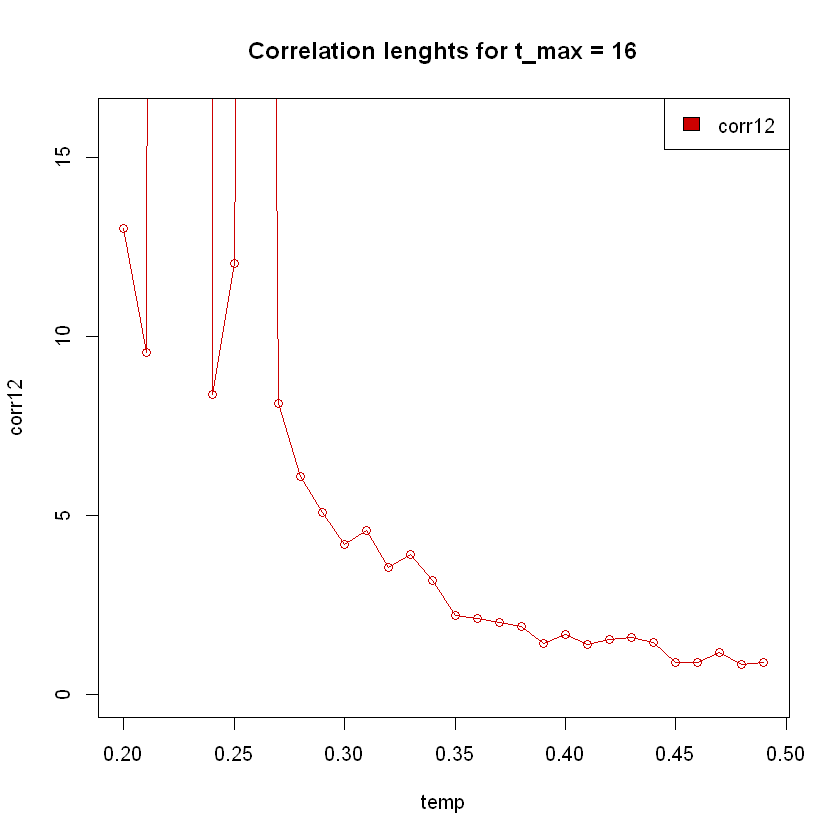

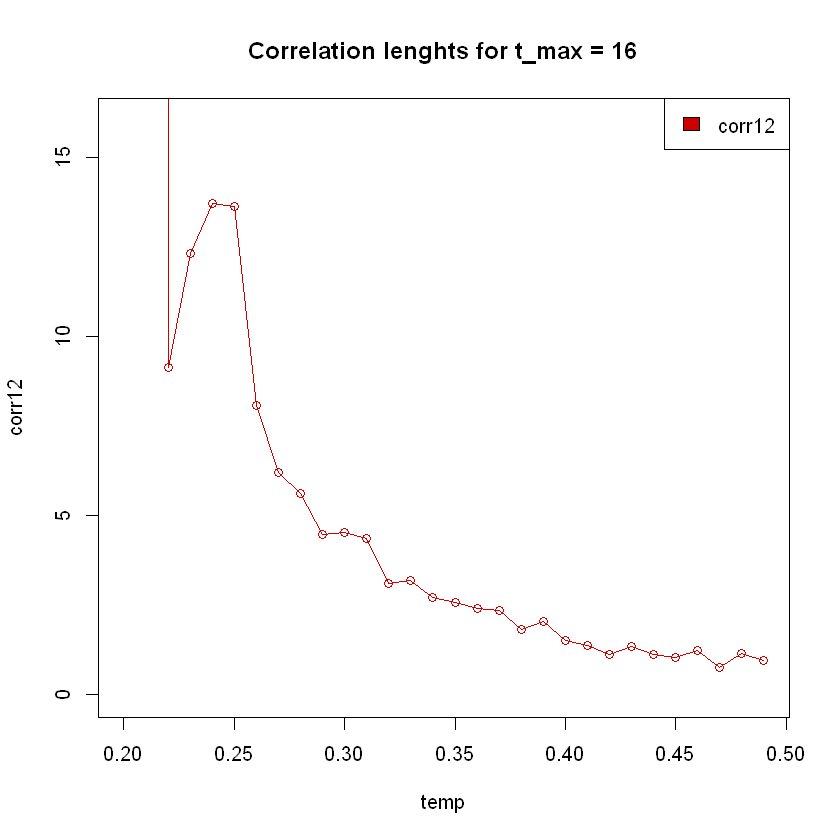

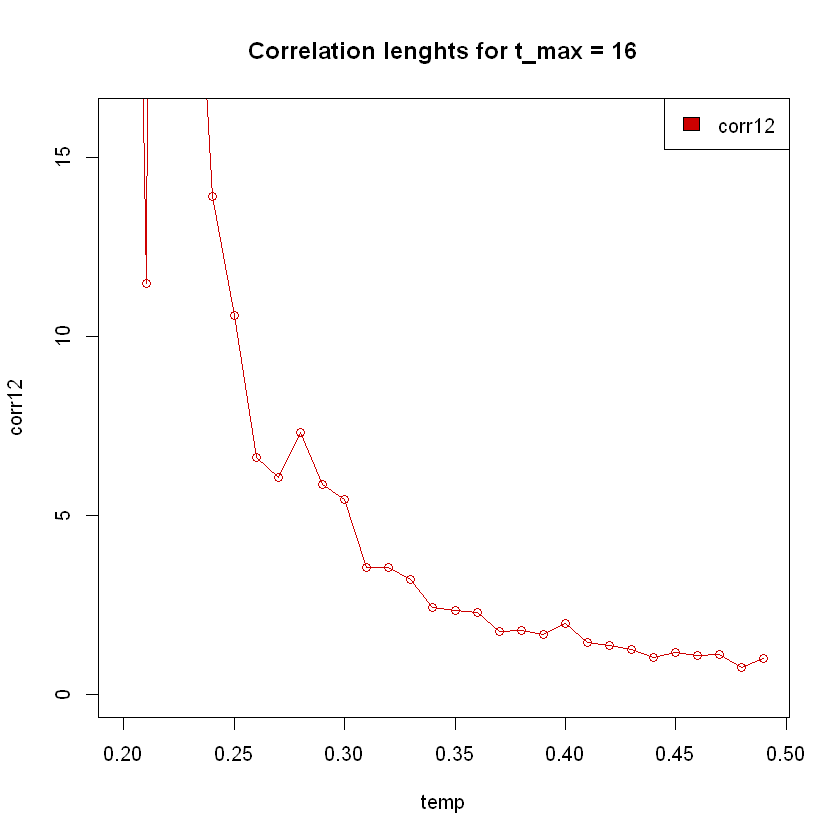

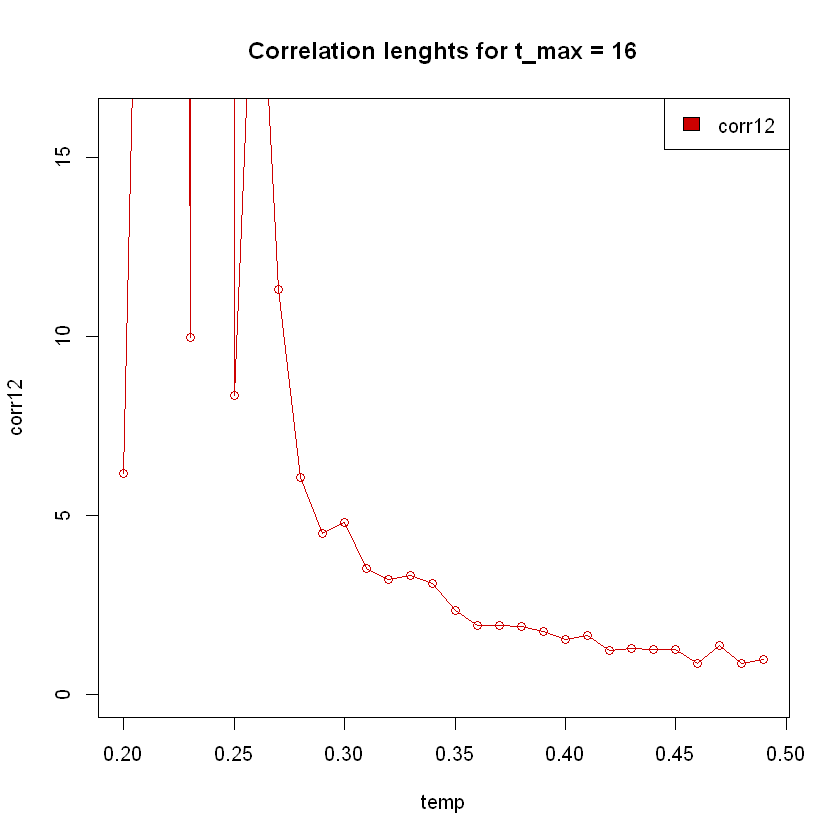

In [3]:
# These are the first five simulations with the less broad temp range
for (sim_index in 1) {
	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	plot(corr12 ~ temp, data = d, ylim = c(0, size), col = "red3", type = "o")
	title(paste("Correlation lenghts for t_max =", size))
	legend <- list(names = c("corr12"), cols = "red3")

	add_plot_line <- function(formula, name, col) {
		points(formula, data = d, col = col)
		lines(formula, data = d, col = col)
		legend$names <- append(legend$names, c(name))
		legend$cols <- append(legend$cols, c(col))
		legend
	}

	#legend <- add_plot_line(corr23 ~ temp, "corr23", "magenta3")
	#legend <- add_plot_line(corr34 ~ temp, "corr34", "purple3")
	#legend <- add_plot_line(corr13 ~ temp, "corr13", "blue3")
	#legend <- add_plot_line(corr24 ~ temp, "corr24", "skyblue3")
	#legend <- add_plot_line(corr14 ~ temp, "corr14", "green3")

	legend("topright", y = legend$names, fill = legend$cols)
}

## Compounded correlation lengths

Warning message in min(x):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(x):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"


ERROR: Error in plot.window(...): endliche 'xlim' Werte nötig


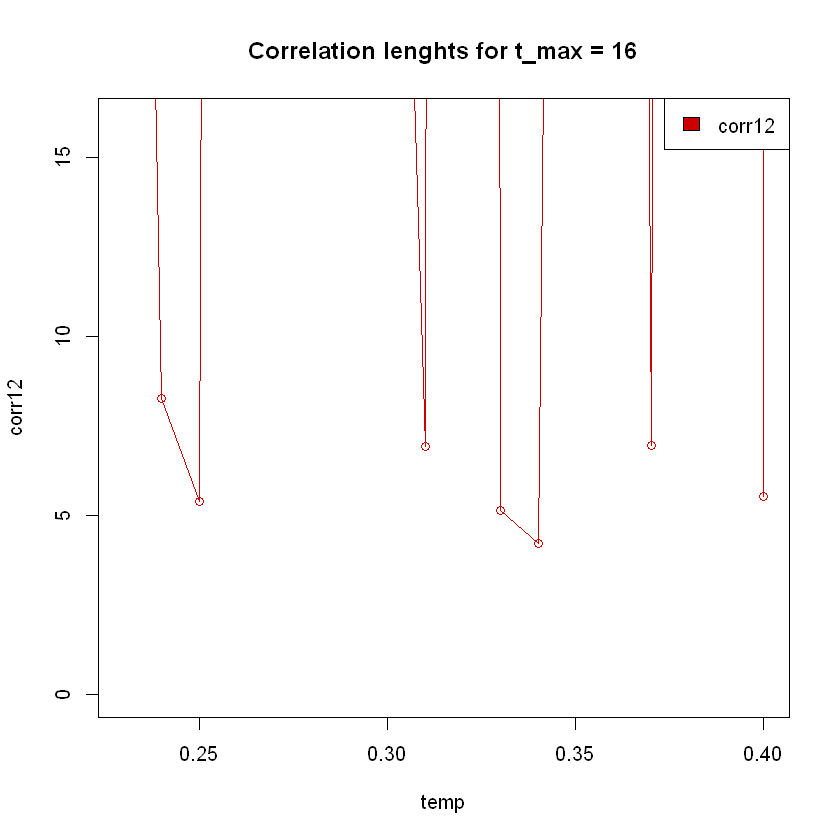

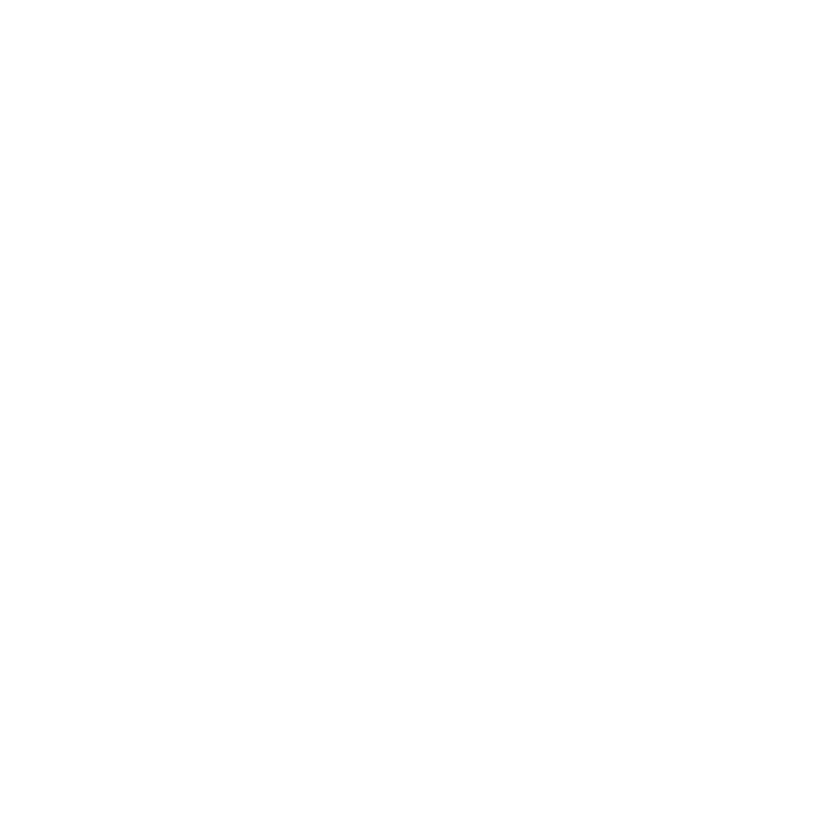

In [3]:
comp <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")
for (size in c(16, 24, 36, 54)) {
	d <- comp[, c("t", "temp", "corr12")]
colnames(d) <- c("max_t", "temp", "corr12")
d <- d[d$max_t == size, ]
plot(corr12 ~ temp, data = d, ylim = c(0, size), col = "red3", type = "o")
title(paste("Correlation lenghts for t_max =", size))
legend <- list(names = c("corr12"), cols = "red3")
legend("topright", y = legend$names, fill = legend$cols)
}

## Correlation functions

[1] 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37
[16] 0.38 0.39 0.40

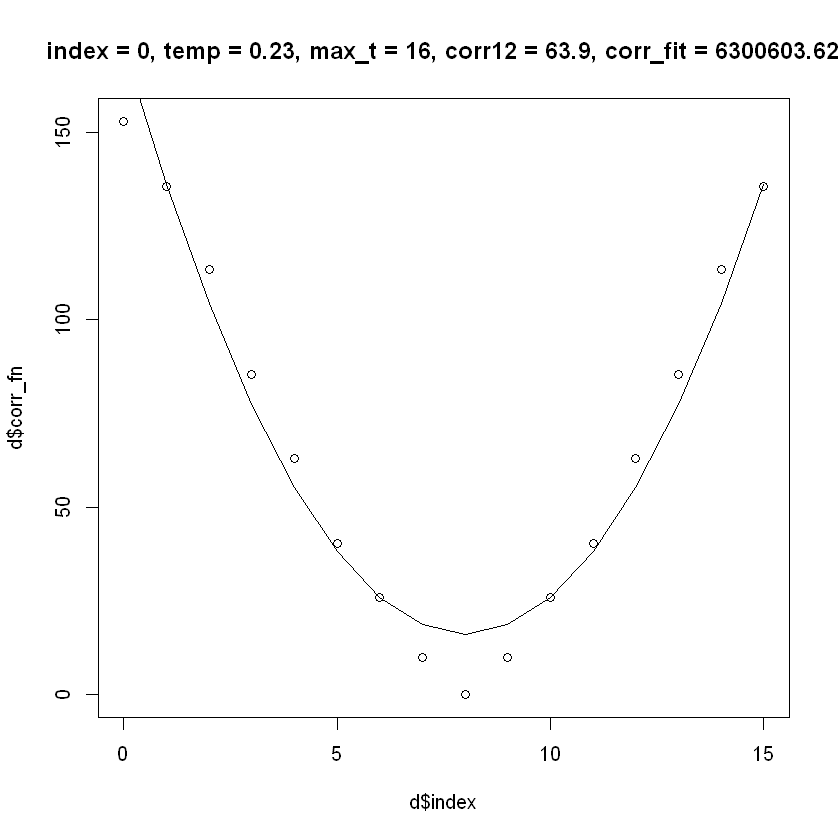

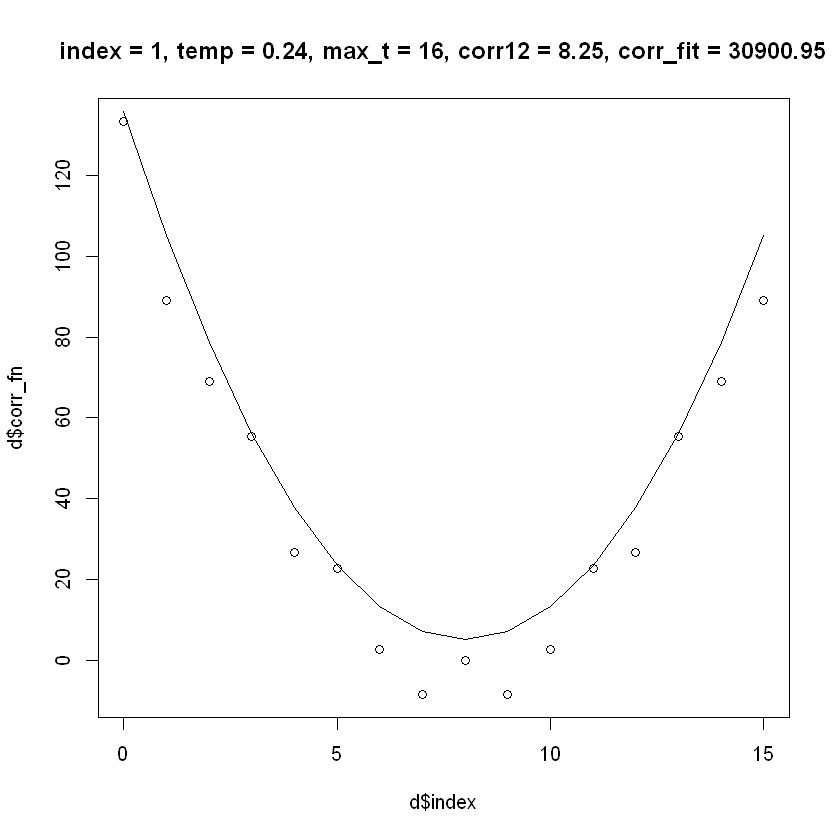

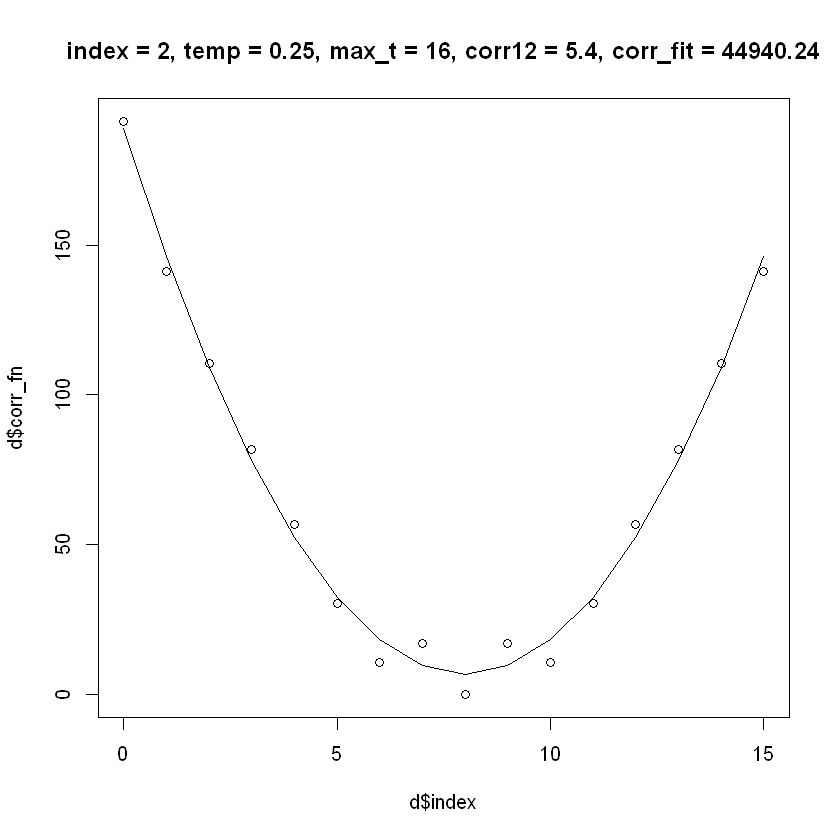

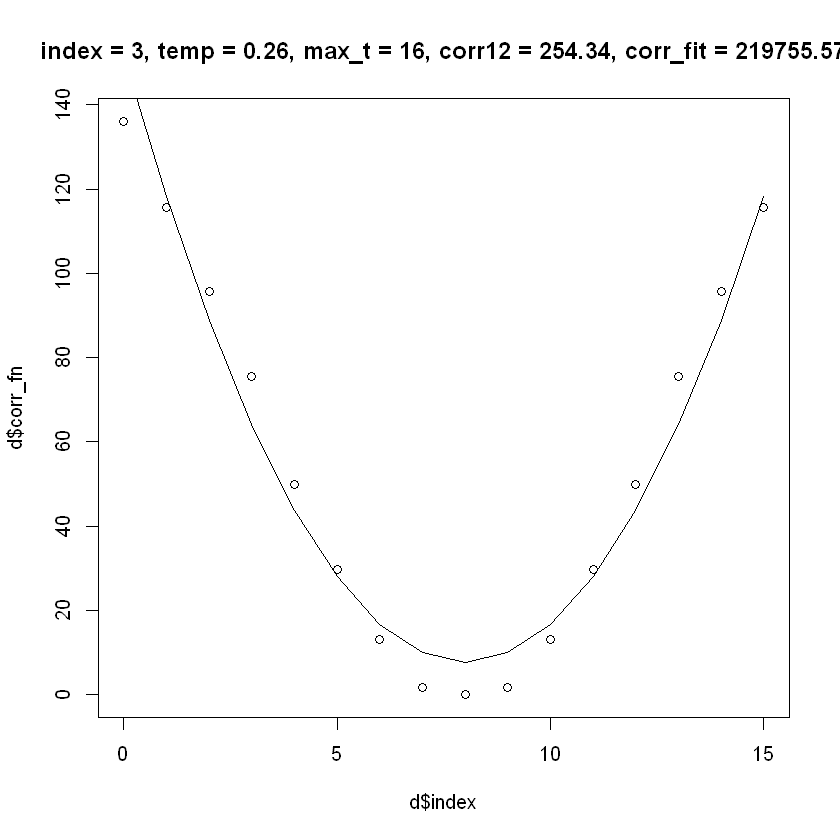

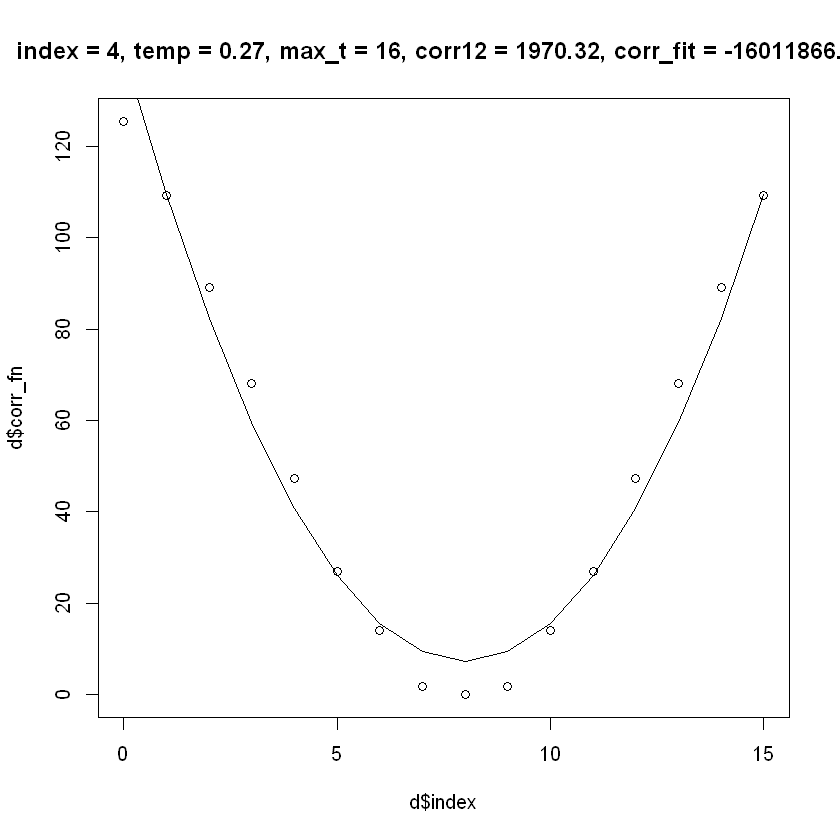

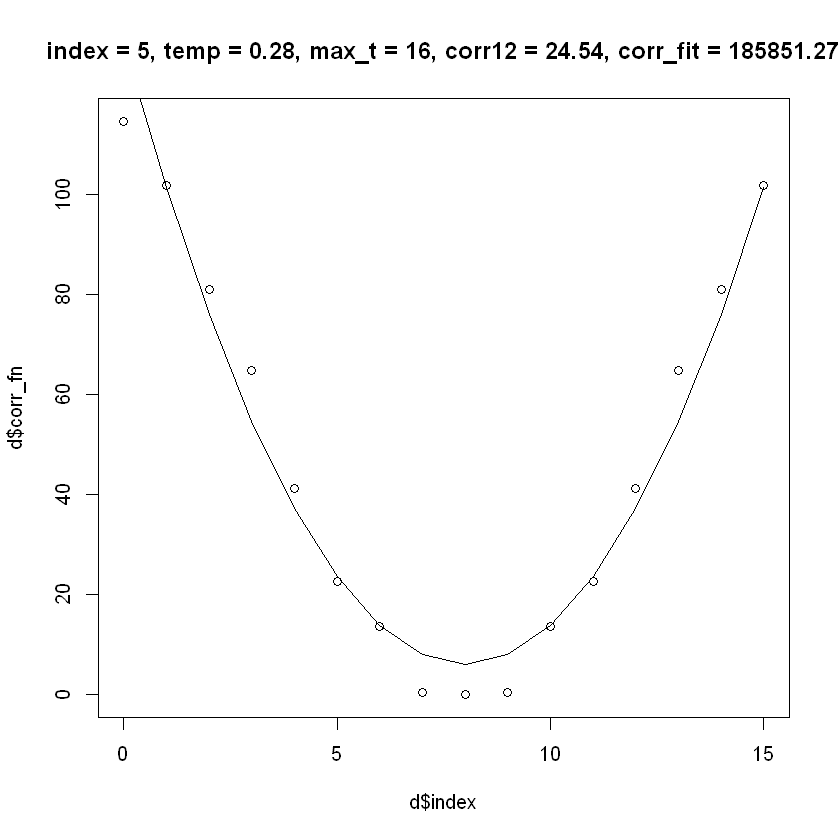

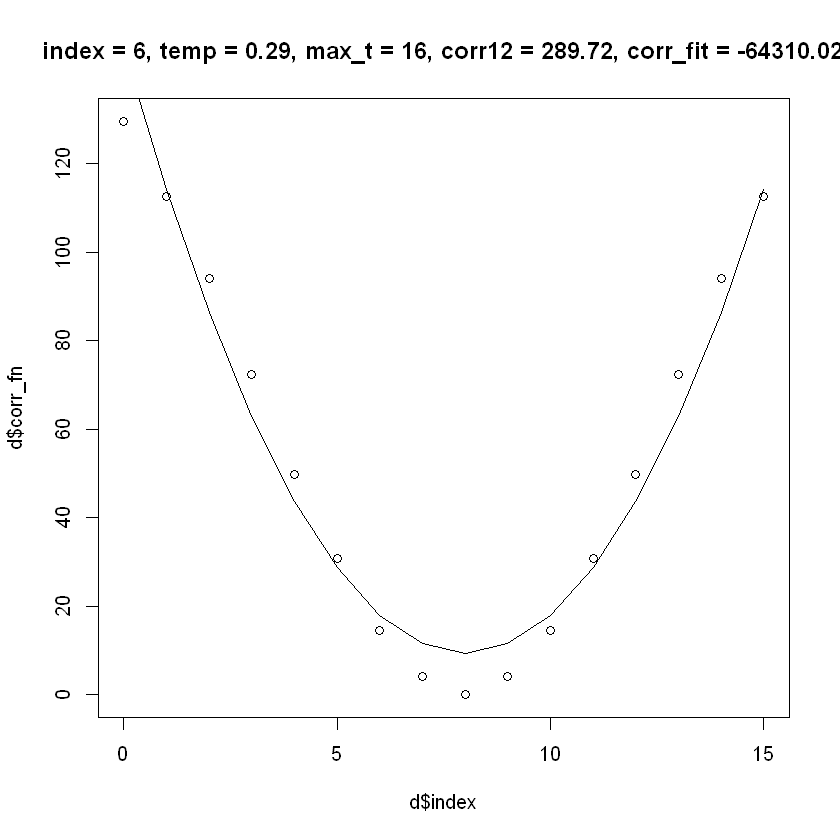

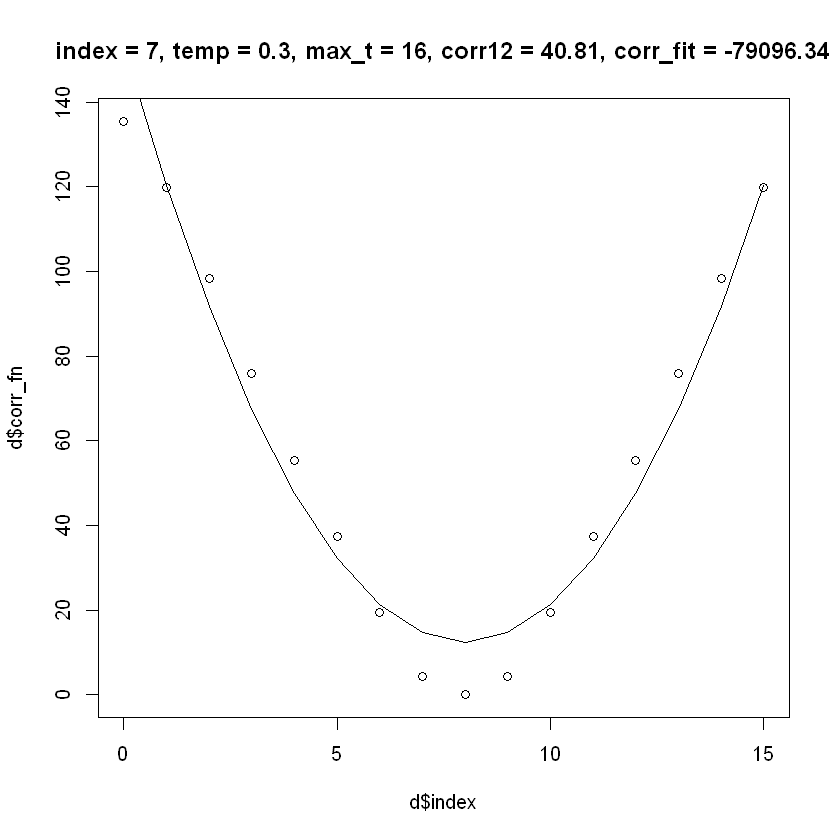

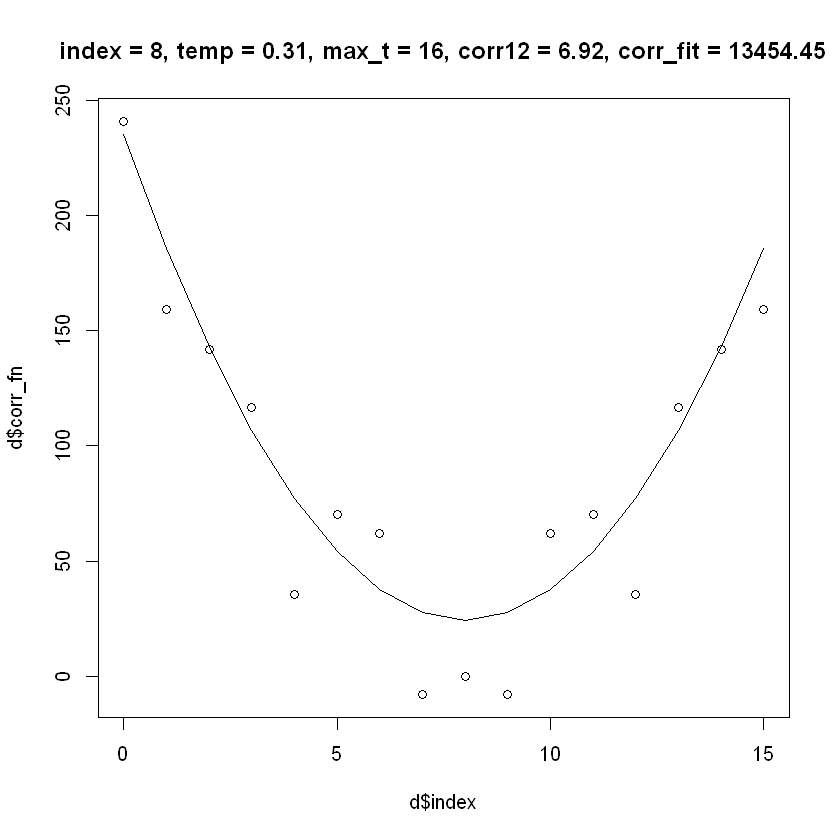

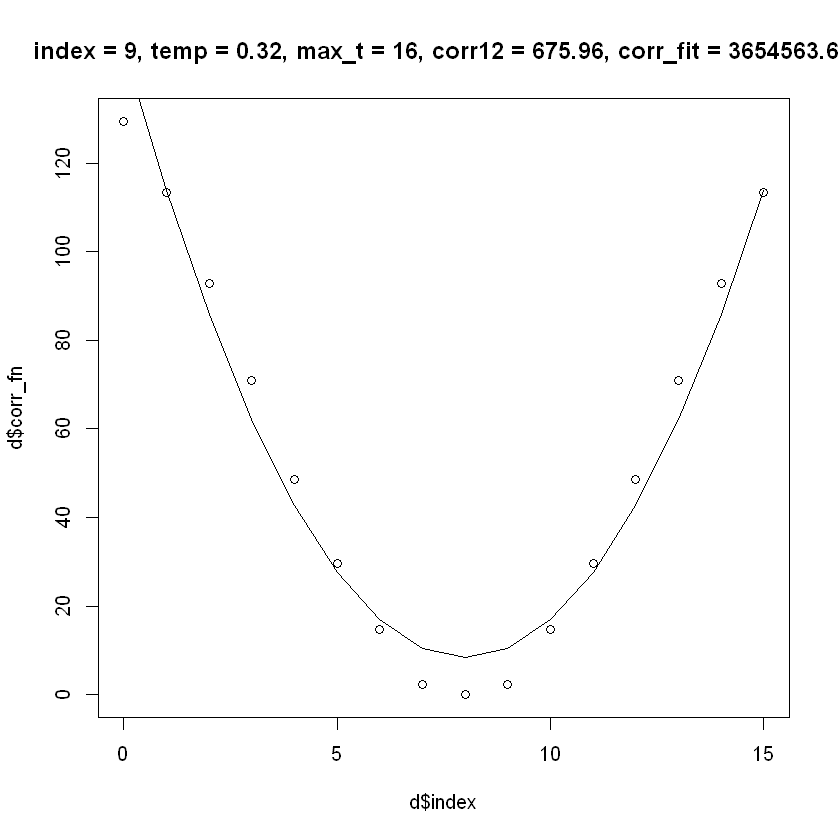

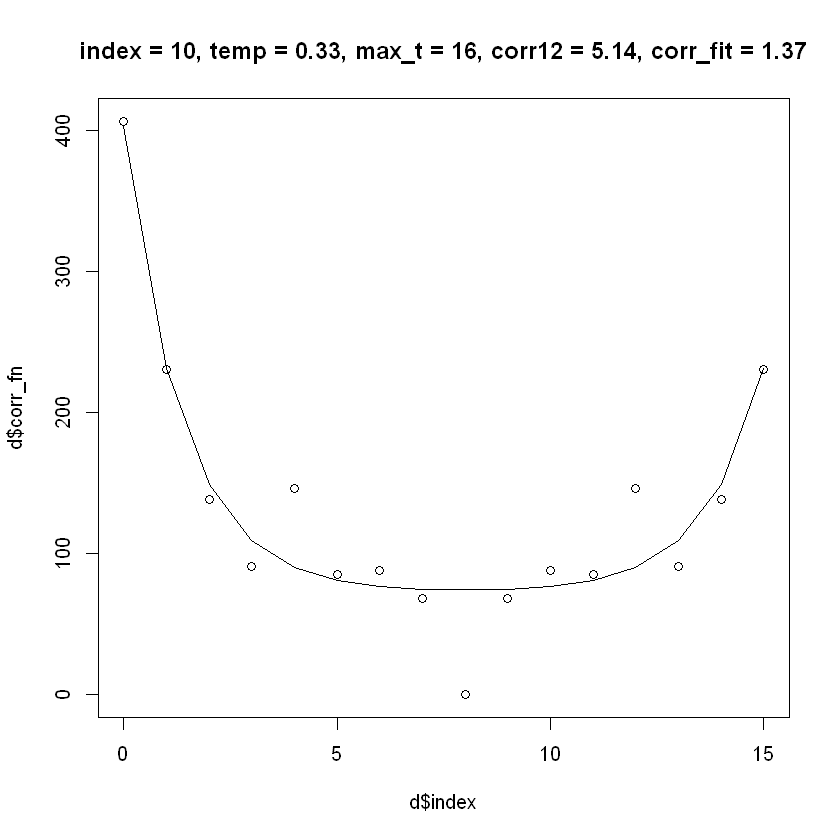

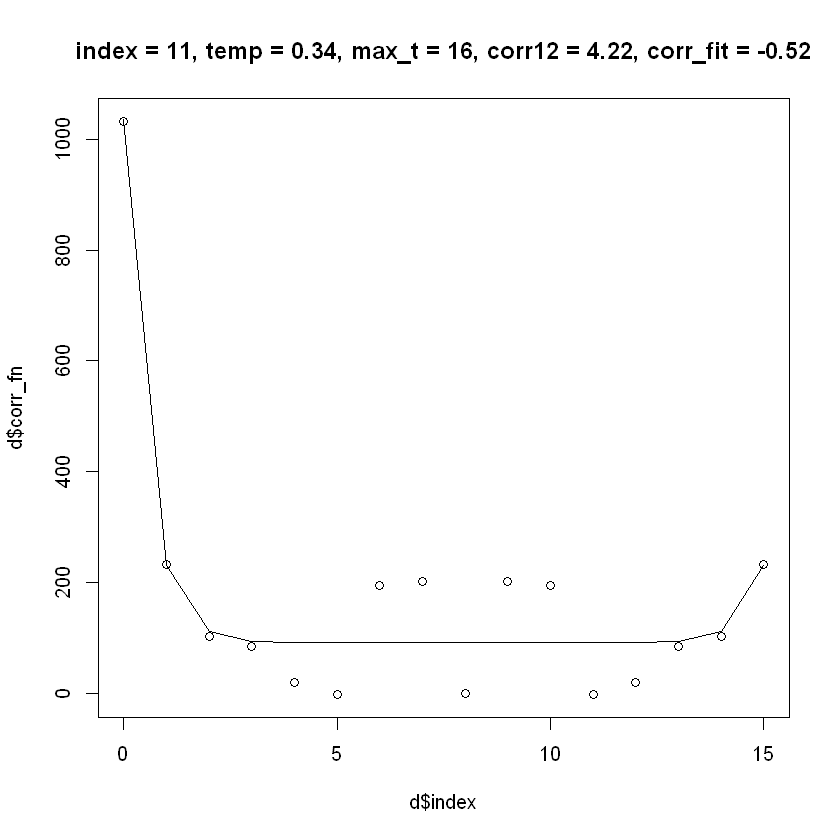

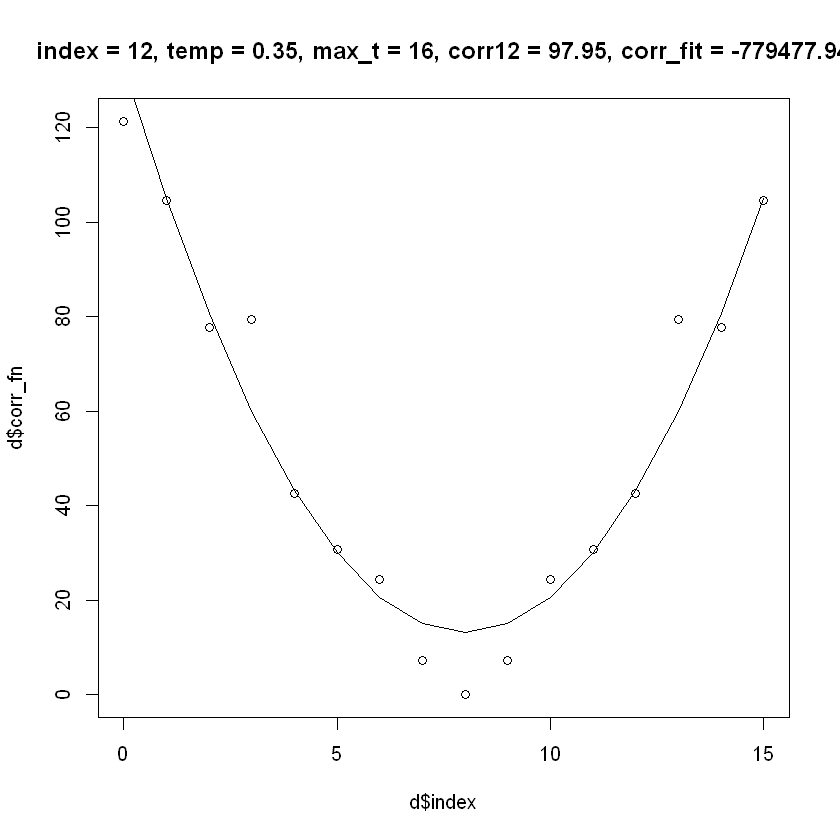

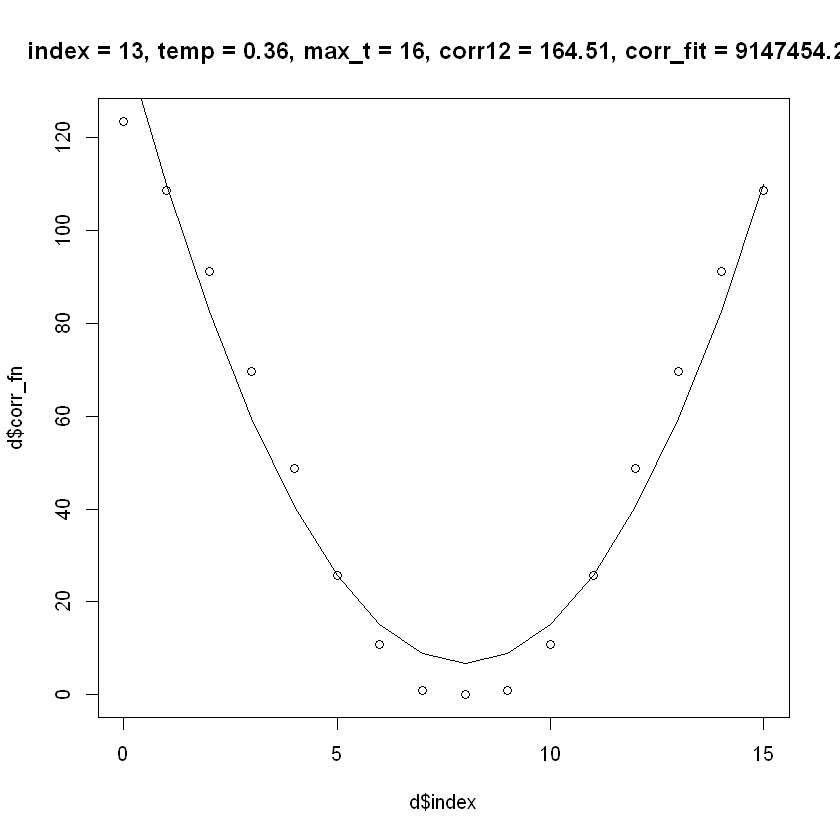

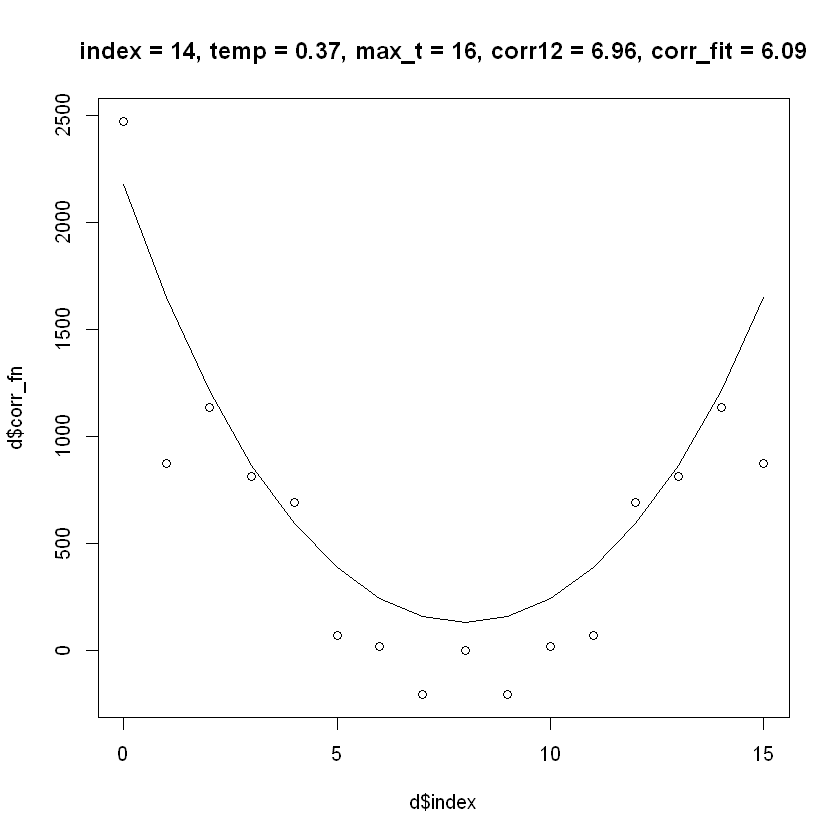

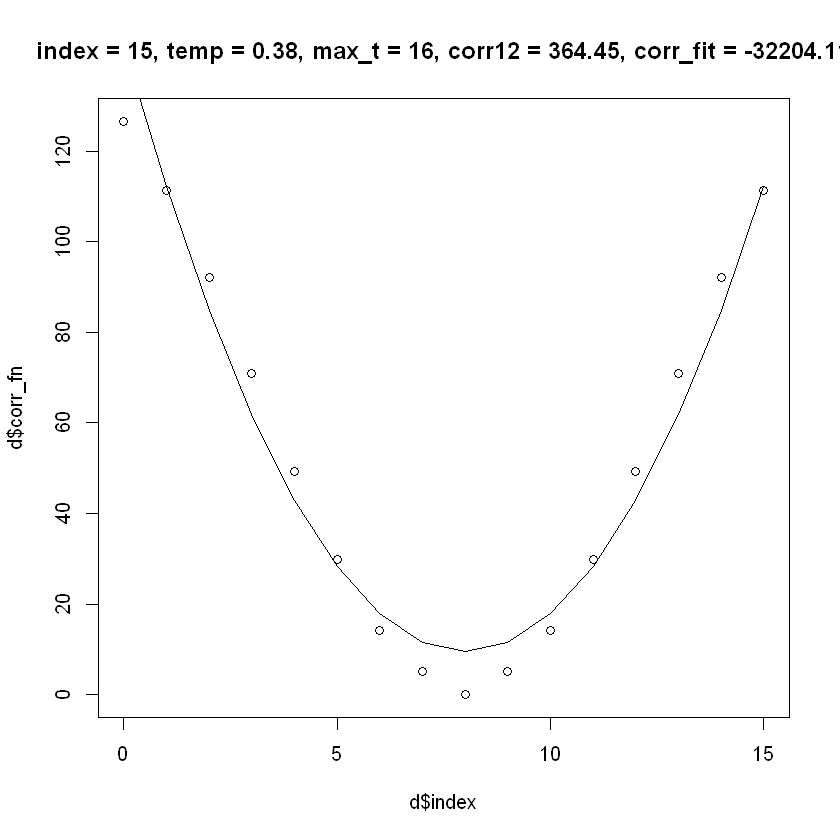

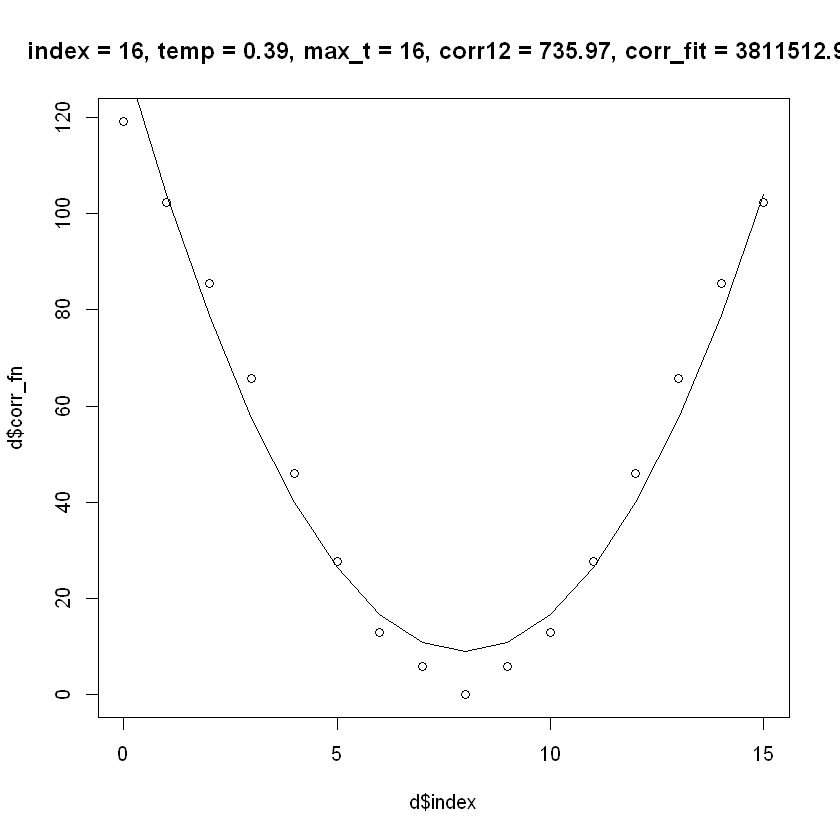

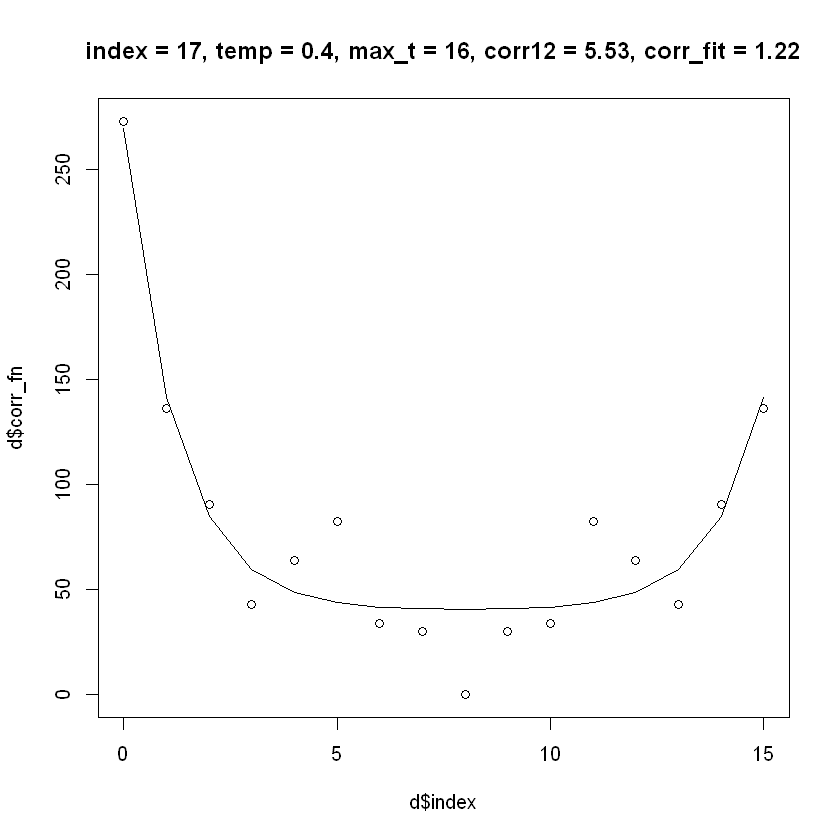

In [6]:
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")

overview$temp#[overview$index >= 50 & overview$index < 60]

#indices <- overview$index[overview$temp >= 0.24 & overview$temp <= 0.26]
for (index in 0:17) {
	d <- read.csv(paste("..\\data\\plot_data\\correlation_data\\correlation_", index, ".csv", sep = ""), header = FALSE)
	colnames(d) <- c("corr_fn")
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$index == index, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
	plot(d$index, d$corr_fn)
	title(paste("index = ", index,
		", temp = ", round(overview$temp[overview$index == index],  digits = 3),
		", max_t = ", overview$max_t[overview$index == index],
		", corr12 = ", overview$corr12[overview$index == index], ", corr_fit = ", overview$corr_fit[overview$index == index], sep = ""))
	lines(d$index, d$fit)
}

## Comparing lattice sizes

In this section we compare the different lattice sizes for the same coupling constants.

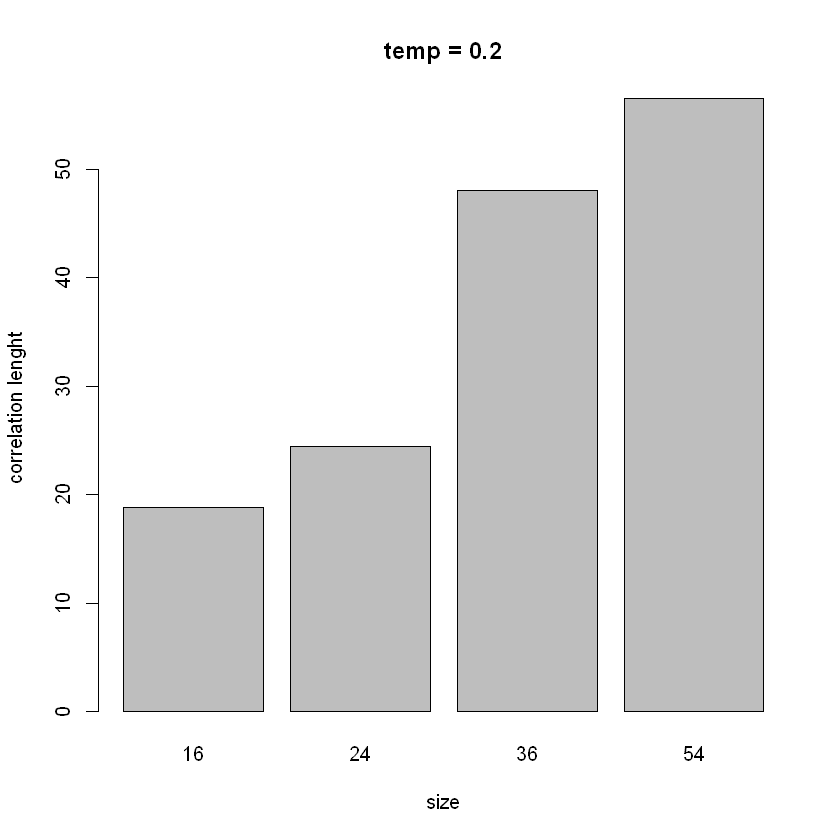

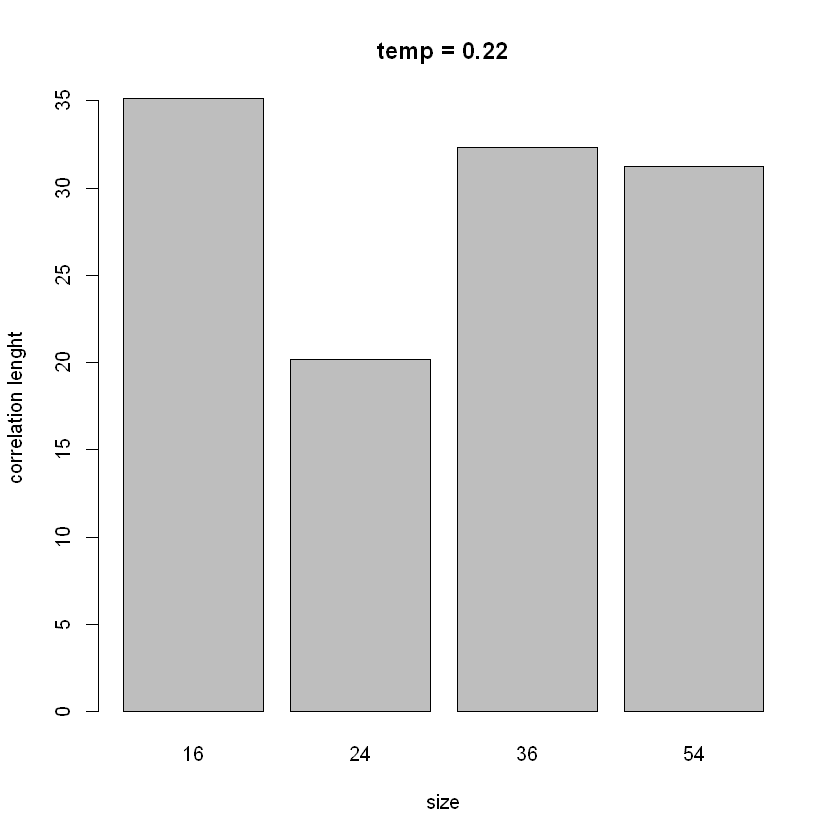

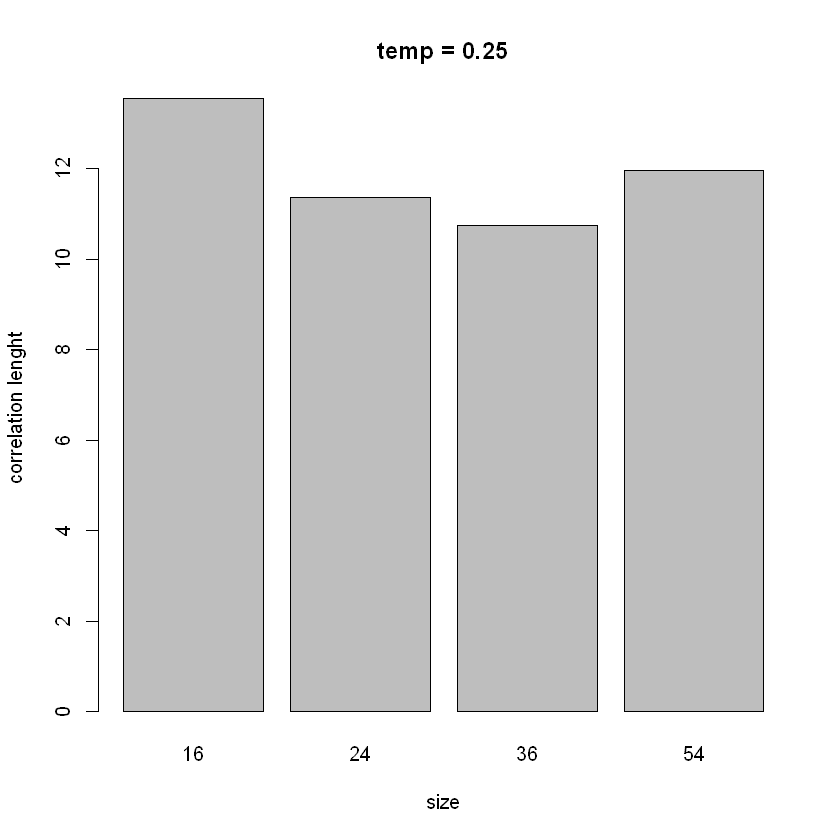

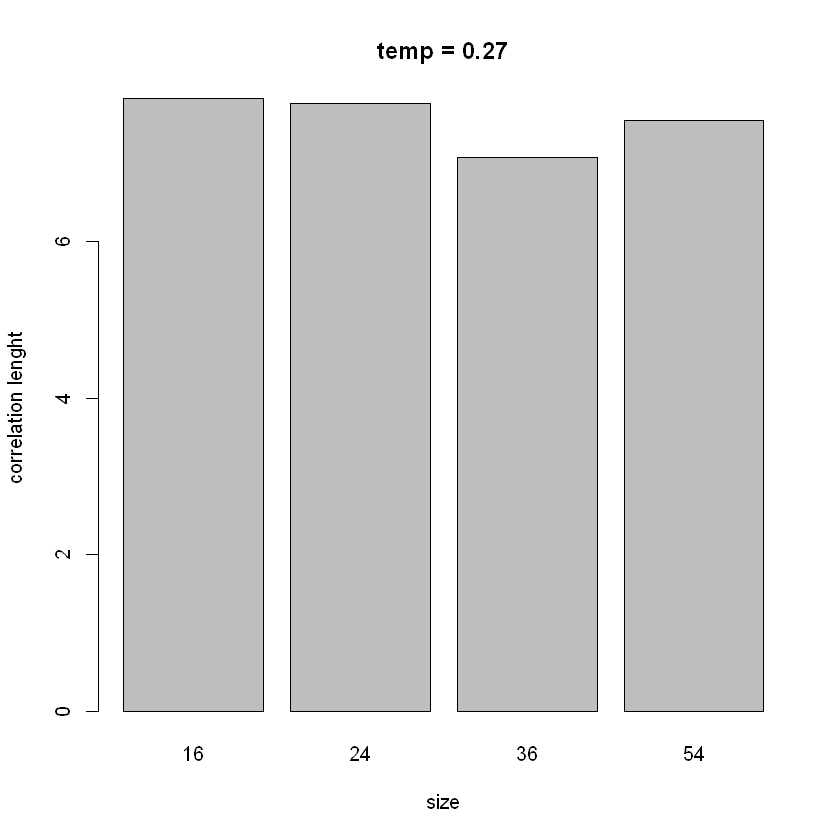

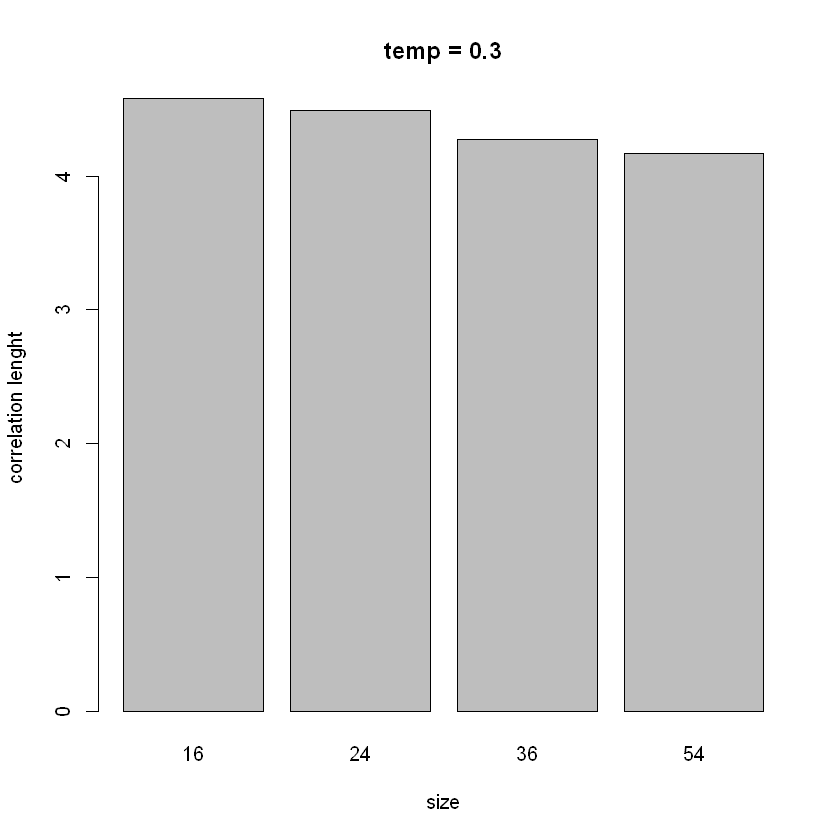

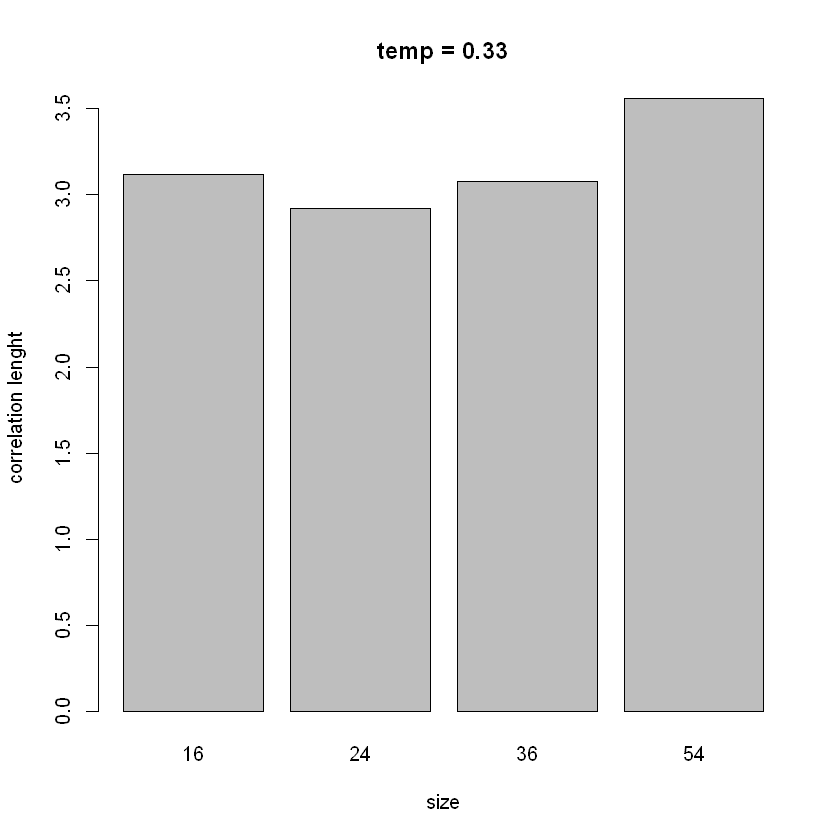

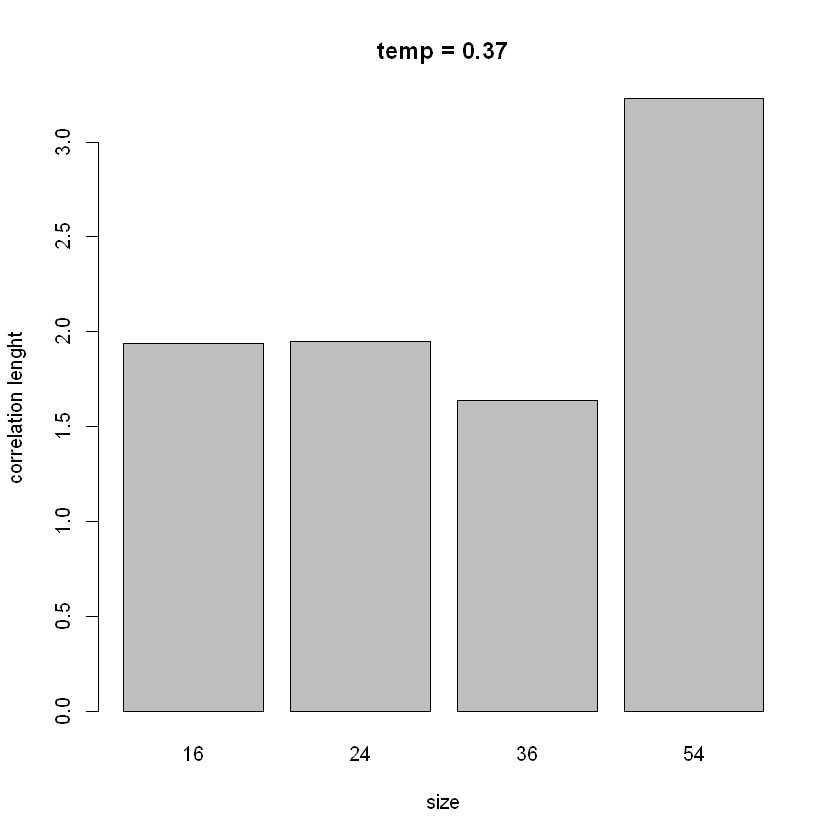

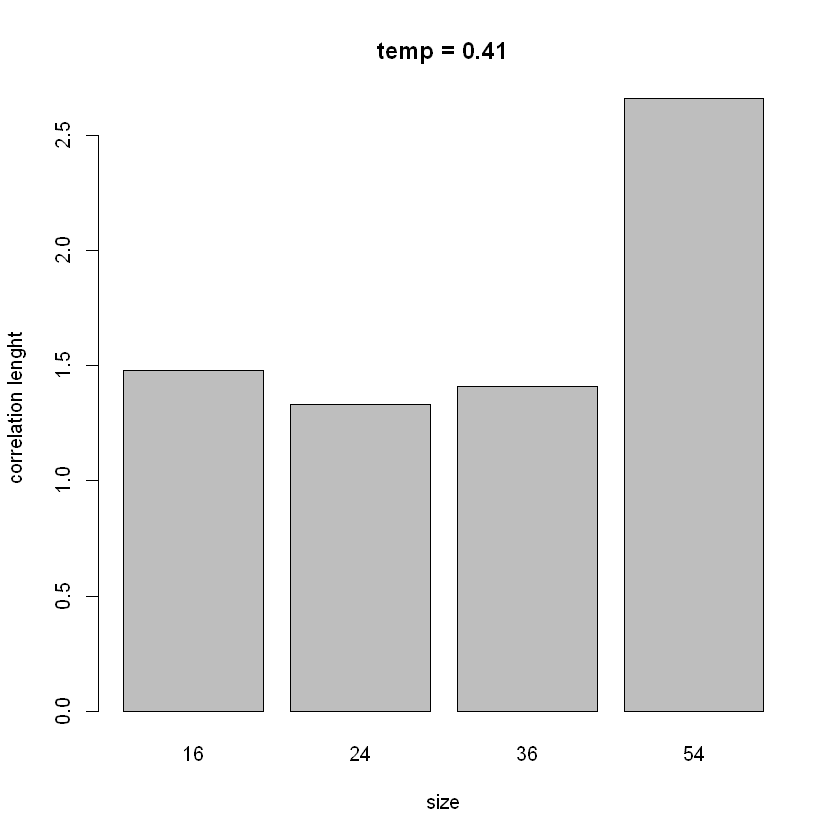

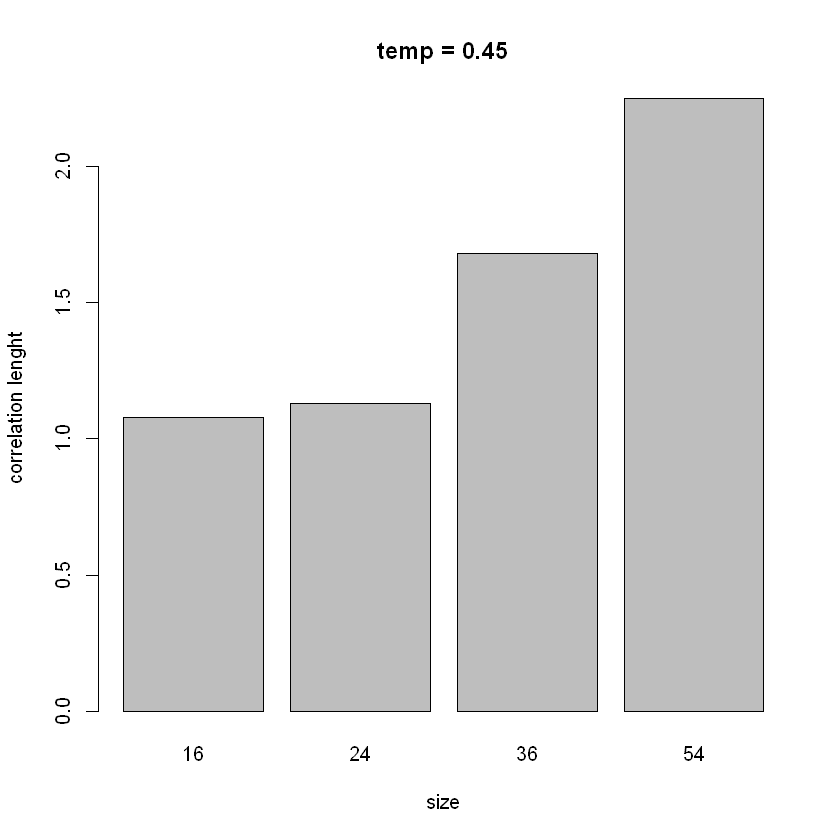

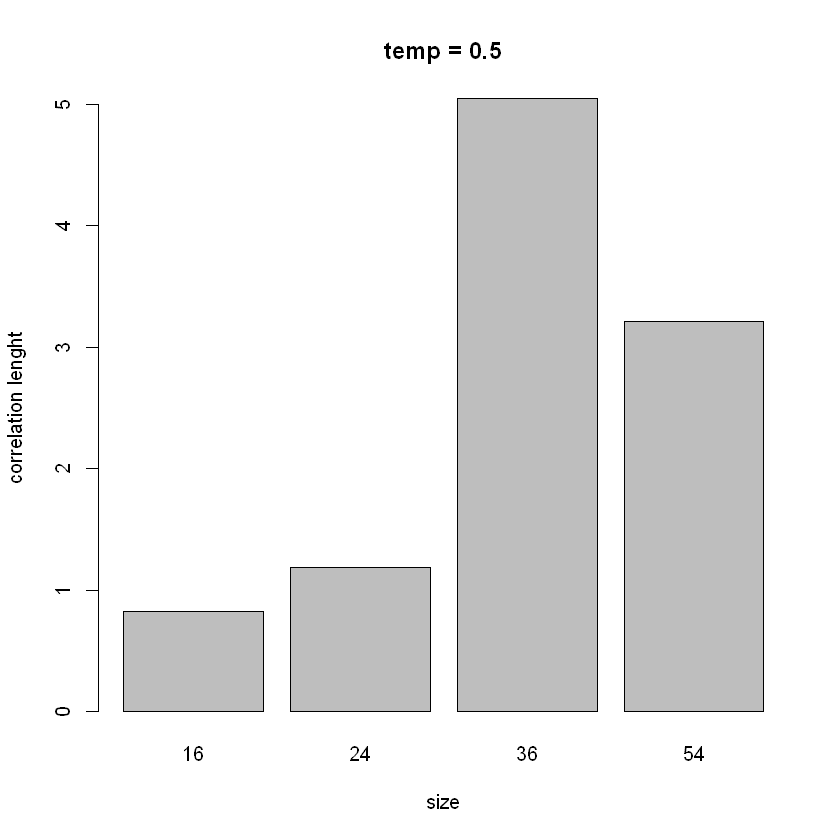

In [32]:
d <- overview[overview$index >= 50, ]

for (temp in d$temp[d$index >= 50 & d$index < 60]) {
	size <- d$max_t[d$temp == temp]
	corr <- d$corr12[d$temp == temp]

	barplot(corr, names.arg = size, xlab = "size", ylab = "correlation lenght")
	title(paste("temp =", temp))
}

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

Warning message in min(d$corr_beta_ratio):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(d$corr_beta_ratio):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"
Warning message in min(d$corr_step_ratio):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(d$corr_step_ratio):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"


ERROR: Error in plot.window(...): endliche 'xlim' Werte nötig


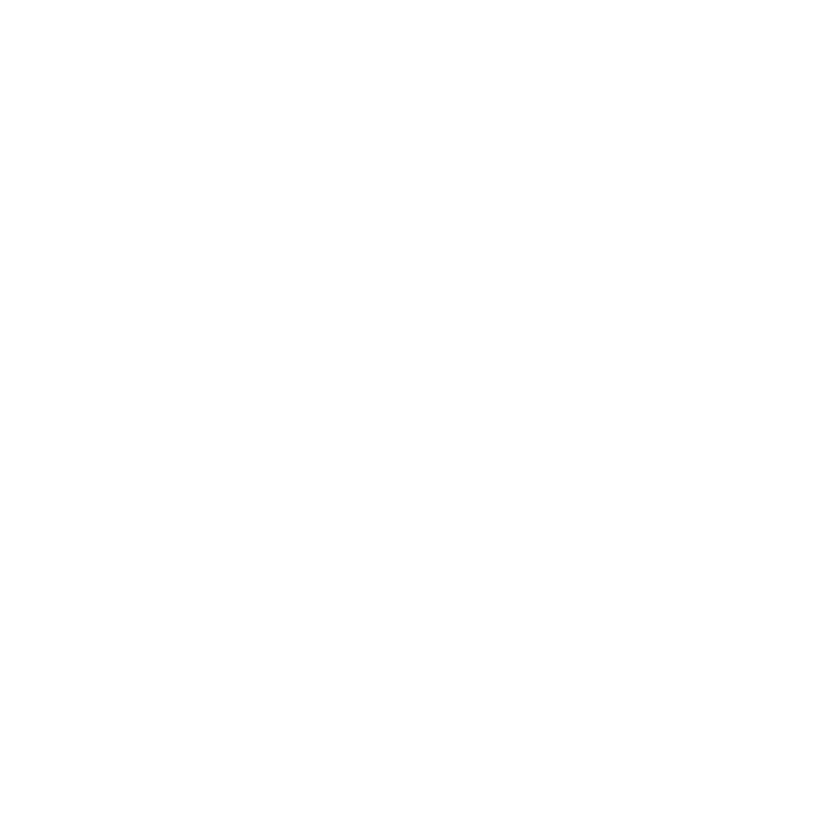

In [7]:
# Loading data
comp <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")
d <- comp[, c("t", "temp", "corr12")]

# Building the x and y axis data
d$corr_beta_ratio <- d$corr12 / d$t
d$corr12_15 <- 0
for (i in 1:nrow(d)) {
	my_temp <- d$temp[i]
	next_size <- d$t[i] * 3 / 2
	d$corr12_15[i] <- ifelse(next_size %in% d$t, d$corr12[d$temp == my_temp & d$t == next_size][1], 0)
}
d$corr_step_ratio <- d$corr12_15 / d$corr12

# Filtering
d <- d[d$corr12 <= d$t * 2, ]
d <- d[d$corr_step_ratio > 0 & d$corr_step_ratio < 3, ]

plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = d[d$t == 16, ],
	col = "blue3",
	pch = 19,
	xlim = c(min(d$corr_beta_ratio), max(d$corr_beta_ratio)),
	ylim = c(min(d$corr_step_ratio), max(d$corr_step_ratio))
)
d[d$t == 16, ]
points(
	corr_step_ratio ~ corr_beta_ratio,
	data = d[d$t == 24, ],
	col = "purple3",
	pch = 19
)
d[d$t == 24, ]
points(
	corr_step_ratio ~ corr_beta_ratio,
	data = d[d$t == 36, ],
	col = "red3",
	pch = 19
)
d[d$t == 36, ]
title("1.5-step-scaling function")
legend("topright", y = c("size = 16", "size = 24", "size = 36"), fill = c("blue3", "purple3", "red3"))